# Learning from images

- Building feed forward nn
- Loading data using *Datasets* and *DataLoaders*
- Understanding Classification Loss


In [1]:
from torchvision import datasets,transforms,utils
import torch
import os 
import numpy as np
from matplotlib import pyplot as plt

In [2]:
DATAPATH = r'C:\Users\muthu\GitHub\DATA 📁'

In [3]:

cifar10:datasets.CIFAR10  = datasets.CIFAR10(root=DATAPATH,download=False)


print(cifar10)

print(type(cifar10).__mro__)

Dataset CIFAR10
    Number of datapoints: 50000
    Root location: C:\Users\muthu\GitHub\DATA 📁
    Split: Train
(<class 'torchvision.datasets.cifar.CIFAR10'>, <class 'torchvision.datasets.vision.VisionDataset'>, <class 'torch.utils.data.dataset.Dataset'>, <class 'typing.Generic'>, <class 'object'>)


### Datasets

<img src="../assets/DATASET.png" />

In [4]:
print("length of total datasets:: {}".format(len(cifar10)))

length of total datasets:: 50000


type of image 4:: <class 'PIL.Image.Image'>


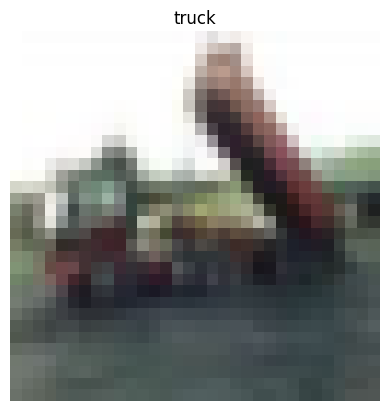

In [5]:
img4 = cifar10[2]
print("type of image 4:: {}".format(type(img4[0])))  # to work on we need Tensor in PyTorch
to_tensor = transforms.ToTensor()  # PIL -> Tensors


plt.imshow(img4[0])
plt.axis('off')
plt.title(cifar10.classes[img4[1]])
plt.show()

In [6]:
truck     = to_tensor(img4[0])
print("shape of image:: {}\ntype of image :: {}\ndevice        :: {}".format(truck.shape, truck.dtype, truck.device)) 
# Shape: (channels, height, weight )

shape of image:: torch.Size([3, 32, 32])
type of image :: torch.float32
device        :: cpu


In [7]:
print("Min Cell Value:: {}, Max Cell Value:: {}".format(cifar10.data.min(), cifar10.data.max() ))
print("Min Cell Value:: {:1.0f}, Max Cell Value::{:1.0f}".format(truck.min(), truck.max()))   # After transformation

Min Cell Value:: 0, Max Cell Value:: 255
Min Cell Value:: 0, Max Cell Value::1


In [8]:
imgs = torch.stack([to_tensor(imgt) for imgt,_ in cifar10],dim=3)

In [9]:
print("compute the mean per channel:: {}".format(imgs.view(3,-1).mean(dim=1)))
print("compute the mean per channel:: {}".format(imgs.view(3,-1).std(dim=1)))

compute the mean per channel:: tensor([0.4914, 0.4822, 0.4465])
compute the mean per channel:: tensor([0.2470, 0.2435, 0.2616])


### DataLoader

![DataLoader](../assets/Datasets%20and%20DataLoader.png)

In [10]:
cifar10:datasets.CIFAR10  = datasets.CIFAR10(
                                        root=DATAPATH,
                                        download=False,
                                        transform=transforms.Compose([
                                                        transforms.ToTensor(),
                                                        # transforms.Normalize(mean=(0.49139968, 0.48215827 ,0.44653124),std=(0.24703233 ,0.24348505, 0.26158768)),
                                                        ]))

In [11]:
batch = next(iter(torch.utils.data.DataLoader(cifar10,batch_size=4,shuffle=True)))

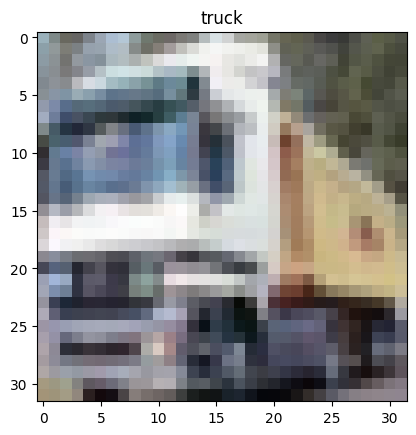

In [12]:
img,label = cifar10[1]
plt.imshow(img.permute(1,2,0))
plt.title(cifar10.classes[label])
plt.show()

torch.Size([3, 36, 138])


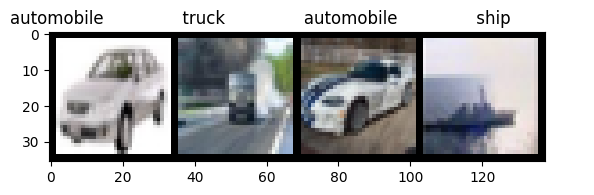

In [13]:
plt.rcParams["savefig.bbox"] = 'tight'
grid = utils.make_grid(batch[0],nrow=4,padding=2,normalize=False)
print(grid.shape)
plt.imshow(grid.permute(1, 2, 0))
plt.title( "{}".format(' '.join( cifar10.classes[i]+'              ' for i in batch[1])))
plt.show()